In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [4]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [6]:
# Encoding Classes into 0 ->[not fire] and 1->[fire]

df["Classes"] = np.where(df["Classes"] == "not fire", 0, 1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
# Independent & Dependent Fetaures
# X = df.iloc[:, :-3].join(df.iloc[:, -2:])
X = df.drop(["FWI"], axis=1)
y = df["FWI"]
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [8]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [10]:
print(X_train.shape, X_test.shape)

(182, 11) (61, 11)


# Important
## Check Multicollinearity 
## **PEARSON Corr. Coef > 0.8 or 0.9**
### Remove Highly Correlated Features
- Redundancy
- Overfitting
- Model Efficiency 

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

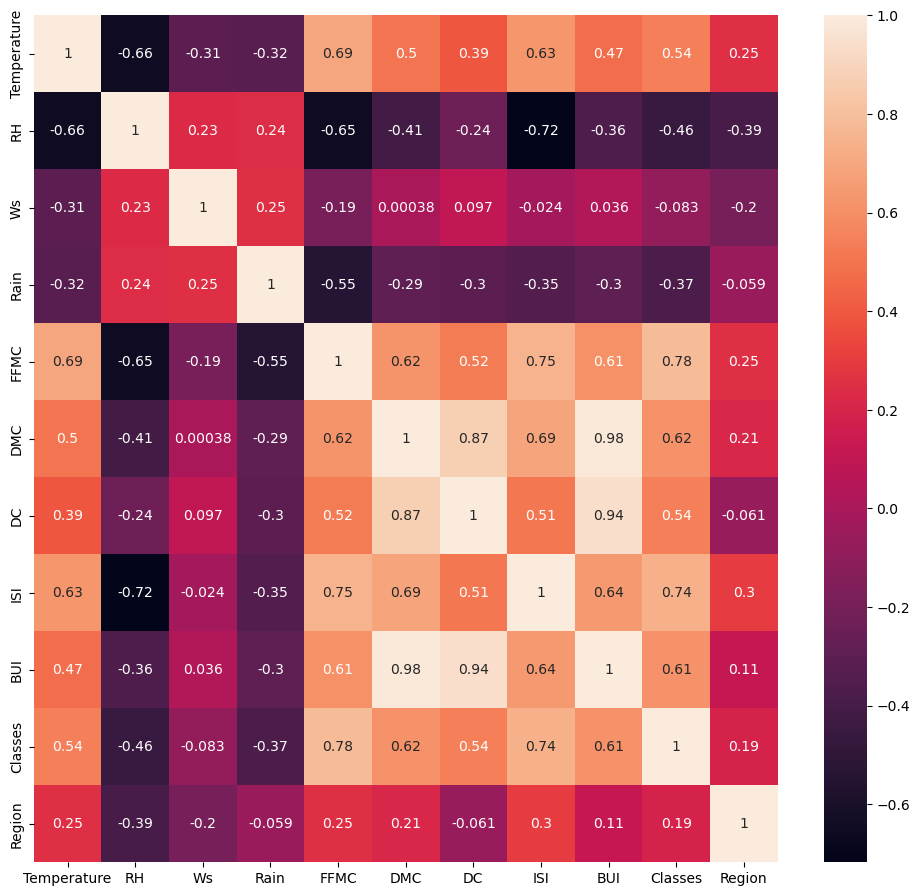

In [12]:
# Check For Multicollinearity (High Correalation > 0.8 or 0.9)
plt.figure(figsize=(12, 11))  # Call This Before Plotting
correlation = X_train.corr()
sns.heatmap(correlation, annot=True)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # To Uniquely store column values
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # iloc used to retrieve 2D Pandas Element
            if abs(corr_matrix.iloc[i, j]) > threshold:  # abs for +ve & -ve correlation
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [15]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [16]:
# Drop these Features when correlation > 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [17]:
print(X_train.shape, X_test.shape)

(182, 9) (61, 9)


# Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box Plots to understand Effect of StandardScaler

<Axes: title={'center': 'X_train_scaled'}>

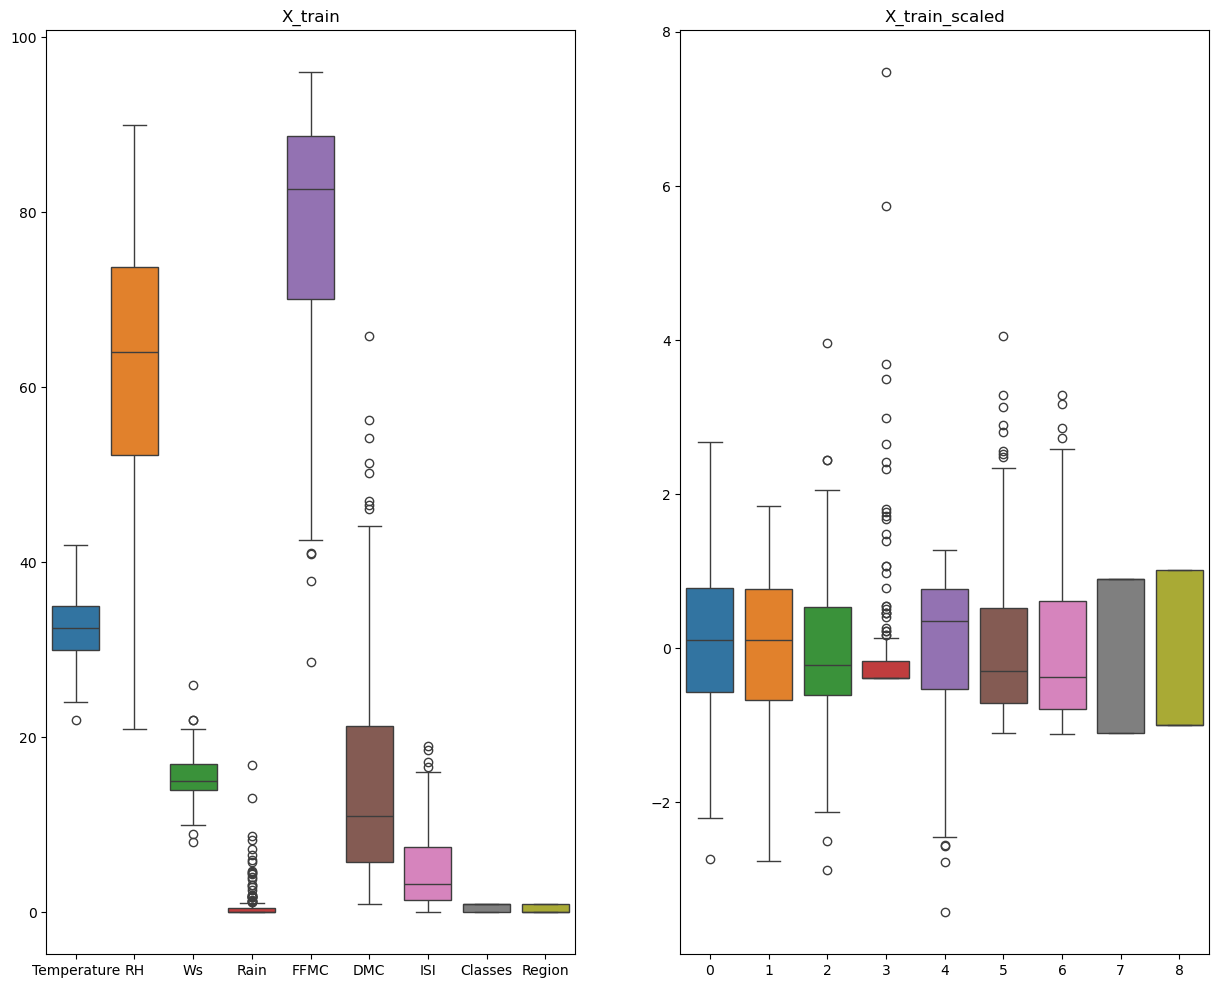

In [20]:
plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title("X_train")
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
plt.title("X_train_scaled")
sns.boxplot(data=X_train_scaled)

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"Mean Squared Error:{mse}\nR2_Score:{score}")

Mean Squared Error:0.67427668737916
R2_Score:0.9847657384266951


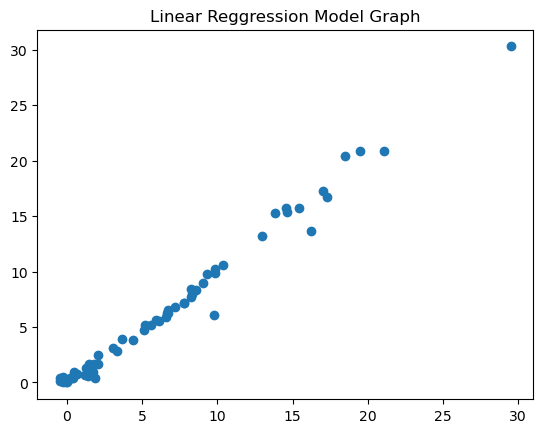

In [23]:
plt.title("Linear Reggression Model Graph")
plt.scatter(y_pred, y_test)  # Good Linear Regression Model

# Lasso Regression	[Removes Highly Correlated ]
- Linear Regression
- Mean Squared Error:0.67427668737916
 R2_Score:0.9847657384266951
- Lasso Regression
- MSE:2.2483458918974764
 R2_Score:0.9492020263112388
- Linear Regression: Likely overfitting the data, capturing almost all variability (R² ≈ 0.985).

- Lasso Regression: A slightly poorer fit (lower R² and higher MSE) but more robust and likely better for generalization if the dataset has many correlated or irrelevant features.

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")

MSE:2.2483458918974764
R2_Score:0.9492020263112388


Text(0.5, 1.0, 'Lasso Regression')

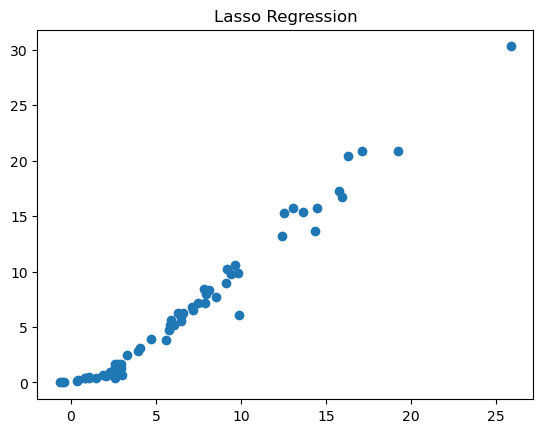

In [26]:
plt.scatter(y_pred, y_test)
plt.title("Lasso Regression")

# Ridge Regression	[Overfitting]

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")

MSE:0.6949198918152069
R2_Score:0.9842993364555513


Text(0.5, 1.0, 'Ridge Regression')

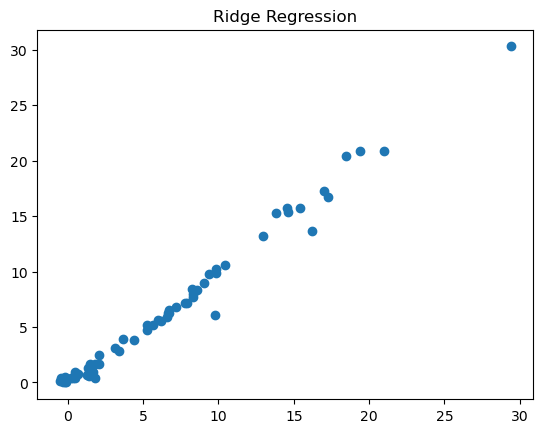

In [29]:
plt.scatter(y_pred, y_test)
plt.title("Ridge Regression")

# ElasticNet Regression [Ridge + Lasso]

In [30]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled, y_train)
y_pred = elasticNet.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")

MSE:5.517251101025224
R2_Score:0.8753460589519703


Text(0.5, 1.0, 'ElasticNet Regression')

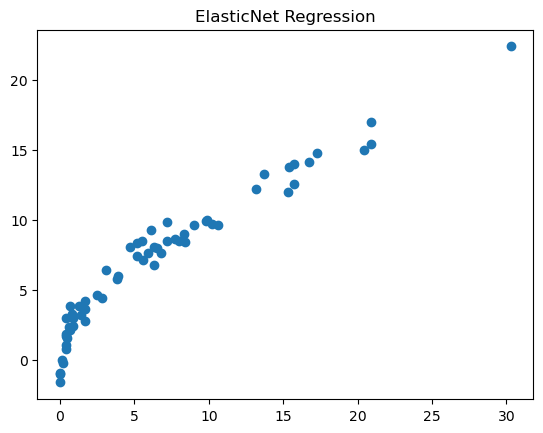

In [32]:
plt.scatter(y_test, y_pred)
plt.title("ElasticNet Regression")

# Cross Validation LassoCV

In [33]:
from sklearn.linear_model import LassoCV

lassoCv = LassoCV(cv=5)
lassoCv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [35]:
y_pred = lassoCv.predict(X_test_scaled)

In [37]:
lassoCv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")

MSE:0.7924995554743622
R2_Score:0.9820946715928275


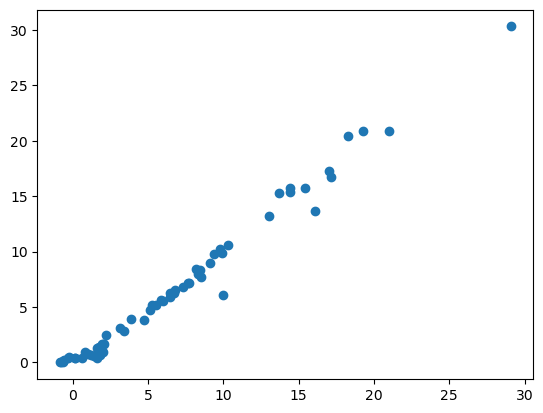

In [36]:
plt.scatter(y_pred, y_test)

# Cross Validation RidgeCV Regression

MSE:0.6949198918152069
R2_Score:0.9842993364555513


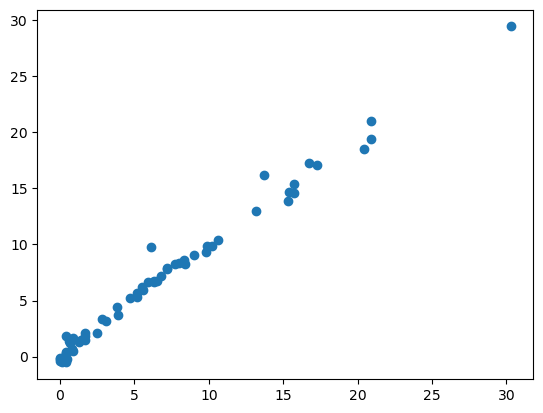

In [40]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")
plt.scatter(y_test, y_pred)

# Cross Validation ElasticNetCV Regression

MSE:0.8222830416276254
R2_Score:0.9814217587854942


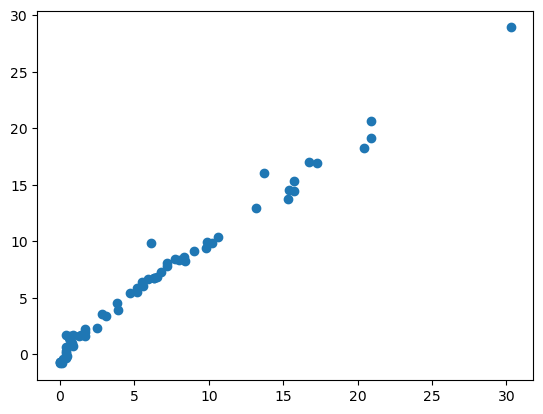

In [42]:
from sklearn.linear_model import ElasticNetCV

elasticNetcv = ElasticNetCV(cv=5)
elasticNetcv.fit(X_train_scaled, y_train)
y_pred = elasticNetcv.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(f"MSE:{mse}\nR2_Score:{score}")
plt.scatter(y_test, y_pred)